# API Basics
We'll be using numpy and opencv pretty heavily, so this first notebook will be aimed at getting familiar with some common use cases. We're assuming you know some python or at least the basics of another programming language, so there's no review of fundamental concepts. We'll link documentation; get used to reading these even if they're pretty dense.

Jupyter notebooks can edited and run as you please, so you're encouraged to work right on top of this notebook and its code examples.

Here is an excellent free e-book to help you learn python if you think you'd find that useful: https://greenteapress.com/wp/think-python/

# Environment
First, here are some commands to set up your python environment, assuming you're using anaconda.
```
conda create --name cv python=3.9 pip
conda activate cv

# Install the CPU only version for compatibility reasons.
pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu
pip3 install opencv-python matplotlib numpy scipy jupyterlab
```

Side note: the environment is set up w/ pip instead of conda packages due to conflicts between the opencv-python package and torchvision. This isn't the "right" way to use conda.

# Creating arrays
The fundamental datatype in numpy is the array. It's a linear sequence of stuff, usually numbers. Most operations in numpy operate on arrays. Here are some examples for creating arrays. You can find numerous others here: https://numpy.org/doc/stable/reference/routines.array-creation.html

In [1]:
# You'll see many sources import numpy like this to shorten it.
# It lets you do np.zeros(5) instead of numpy.zeros(5) for instance.
import numpy as np

In [2]:
# From a list
listarray = np.array([1,2,3,4,5])
print("From list: ", listarray)

all_zeros = np.zeros(3)
print("All zero: ", all_zeros)

all_zero_2d = np.zeros([2,7])
print("All zero 2D: \n", all_zero_2d)

# By the way, this is how to see the dimensions of an array
print(all_zero_2d.shape)

# Sequence of numbers between two values with a fixed number of equally spaced elements
seq = np.linspace(0, 15, 10)
print("Linspace: ", seq)

From list:  [1 2 3 4 5]
All zero:  [0. 0. 0.]
All zero 2D: 
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
(2, 7)
Linspace:  [ 0.          1.66666667  3.33333333  5.          6.66666667  8.33333333
 10.         11.66666667 13.33333333 15.        ]


# Accessing arrays
Next, let's look at how to read the values in an array, starting with 1D arrays. The simplest case is for an individual element.

In [3]:
# Friendly reminder that computers start indicies at 0, meaning the first element of an array is at index 0.
print(listarray[1])

2


Things get much more interesting with slices. Slices create "views" into an array that let you select some subset of the array efficiently. The syntax for a slice is `array[start:stop:step]`. Let's look at some examples again.

In [4]:
ex = np.arange(8)
print(ex)

[0 1 2 3 4 5 6 7]


In [5]:
print(ex[0:3]) # Elements between index 0 and 3, inclusive on the lower end. If step is omitted it's 1.
print(ex[0:5:2]) # Every other element between index 0 and 5.
print(ex[:3]) # If you omit start, it's the beginning of the array.
print(ex[1:]) # If you omit stop, it's the end of the array
print(ex[-1]) # Negative index is allowed and wraps around to the end
print(ex[::-1]) # Negative steps are also allowed and step through the array in reverse

[0 1 2]
[0 2 4]
[0 1 2]
[1 2 3 4 5 6 7]
7
[7 6 5 4 3 2 1 0]


Since we'll be working with images later, let's also look at how to slice arrays with more than one dimension.

Again, here's the primary documentation: https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing

In [6]:
# This creates a new array of 32 elements, then forces them into a 4x8 shape instead of a 32x1
ex2d = np.arange(0, 32).reshape((4,8))
print(ex2d)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]]


In [7]:
print(ex2d[3, 4]) # Single element access. Again, indexing starts at 0 so index 3 is the fourth element...
print(ex2d[::2,::4]) # Every other element vertically, then every 4th element horizontally
print(ex2d[:2, :2]) # The top left 2x2 box
print(ex2d[-2:, -2:]) # The bottom right 2x2 box

width = ex2d.shape[1]
height = ex2d.shape[0]
print(ex2d[0:2, width-2:width]) # Upper right box

# Finally, note that just ":" means "everything in this dimension".
print(ex2d[:,0]) # The whole vertical in column 0.

28
[[ 0  4]
 [16 20]]
[[0 1]
 [8 9]]
[[22 23]
 [30 31]]
[[ 6  7]
 [14 15]]
[ 0  8 16 24]


This syntax generalizes to higher dimensions than 2. Please note the index orders: in these 2D examples the first index selects the row, and the second index selects the column which is opposite of the (x,y) order we tend to think in.

In [8]:
# Try finding the lower left box, or the right 4x4 half of the array on your own in this cell

# Array Math
Numpy provides many arithmetic operations that simply do "the right thing" on arrays. You can easily add a constant to an array, or an array to an array as naturally as adding regular numbers in python. Additionally, most numpy functions can be chained together as long as the dimensions of the arrays they're operating on match

In [9]:
print(1 + np.zeros(5))
print(np.arange(5) + np.arange(5, 10)) # 0,1,2,3,4 + 5,6,7,8,9
print(np.abs([-1,-2,3,4])) # Absolute value
print(np.sum([1,3,7]))
print(np.max(np.abs([0, -100, 10, 4])))
# print(np.arange(2) + np.arange(3)) # Doesn't work, arrays aren't the same shape

[1. 1. 1. 1. 1.]
[ 5  7  9 11 13]
[1 2 3 4]
11
100


Let's put a few things together and plot it. By the way, numpy + matplotlib can easily replace your graphing calculator and then some, so bin that TI-84 and learn python.

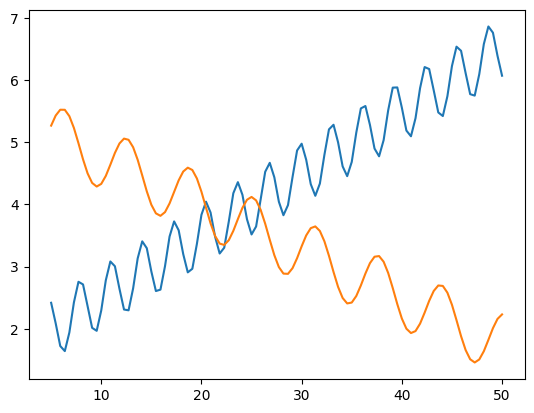

In [10]:
import matplotlib.pyplot as plt

xs = np.linspace(5, 50, 100) # 100 datapoints between 5 and 50
ys0 = np.sin(xs)**2 + 0.1*xs + 1 # y = sin(x)^2 + x/10 + 1

ys1 = np.cos(0.5*xs)**2 + -0.075*xs + 5
plt.plot(xs, ys0)
plt.plot(xs, ys1)

# Starting out with OpenCV
Now let's load an image and use OpenCV a bit. This won't be of much use yet, but here's a link to the OpenCV docs: https://docs.opencv.org/4.x/index.html. These are pretty confusing to read because they are actually for the C++ version of OpenCV. There's no native python documentation, so typically we need to translate the C++ docs. In fact, OpenCV itself is not written directly in python: rather it is a native library that Python interfaces to.

In [11]:
import cv2 # OpenCV is called cv2 for historical reasons

img = cv2.imread('0_grip_pipeline/powerup.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale
plt.imshow(img, cmap='gray')

[ WARN:0@0.004] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('0_grip_pipeline/powerup.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


By the way, OpenCV images are represented by numpy arrays, which is why we spent the top half of this notebook learning about numpy arrays

In [ ]:
print(type(img))

Let's look at `cv2.threshold`. Refer to https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html for more info.

In [ ]:
help(cv2.threshold)

In [ ]:
# By the way, typically images are 8 bits per pixel, meaning the maximum value is 2**8 - 1.
ret, out = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
plt.imshow(out, cmap='gray')

For other python specific tutorials see:
https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

# Homework
Feel free to do any "homework" problems with others or using any resources + documentation found online, You're also welcome to post on the team Slack in `#computer-vision`.

Using an image of your choice...
1. Load the image as grayscale like above and determine the average pixel value of the image.
2. Threshold the image such that all values below average found in (1) are black, and all above the average are white.
3. Calculate the percentage of pixels in the image that are greater than the average.
4. (bonus) Segment the image into 4 equally sized quadrants and print which quandrant has
    * The greatest percentage of above-threshold pixels
    * The greatest MEDIAN pixel value (np.median)
    
Try to design your solution so that later steps build on top of the earlier ones. While testing your program, you should verify your results against a smaller "image" you can create manually.
For instance, if you make something like this...

In [ ]:
print(np.array(([0, 0],
                [5, 5])))

Then you can calculate the average and white/black pixels by hand.

In [ ]:
# Here's the `for` loop syntax, if you're not familiar:
arr = np.arange(9).reshape((3,3))
for row in range(arr.shape[0]):
    for col in range(arr.shape[1]):
        print(arr[row, col])